## Credit Card Fraud Detection Case Study - Capstone Project
#### Problem Statement
<span style="color:Green">For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
    
<span style="color:Green">In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions
    
<span style="color:Green">Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card. Apart from this, the other ways are:

<span style="color:Red">1.Manipulation/alteration of genuine cards <br>
                           2.Creation of counterfeit cards<br>
                            3.Stolen/lost credit cards<br>
                            4.Fraudulent telemarketing<br>
    
#### Data Dictionary :    
<span style="color:Green">The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others
    
#### Project Pipeline : 
<span style="color:Green">1.Exploratory data analytics (EDA)<br>
2.Pre-processing (transformations and removing uwanted columns)<br>
3.Model-Building/Hyperparameter Tuning<br>
4.up-Sampling as the data is imbalanced and training using various models<br>
5.Model Evaluation (identifying top performing model for the business case)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [3]:
# Importing computational packages
# import numpy as np
# import pandas as pd

# # Importing visualization packages
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

##### observe the different feature type present in the data

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [8]:
classes

0    284315
1       492
Name: Class, dtype: int64

In [9]:
normal_share

99.82725143693798

In [10]:
fraud_share

0.1727485630620034

##### Observation : It is observed that 99.8 percentage of records are non fraudulent and 0.17 percent are fruad transactions

Text(0, 0.5, 'Frequency')

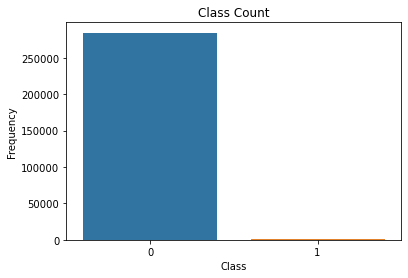

In [11]:

class_count = pd.value_counts(df['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=df)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

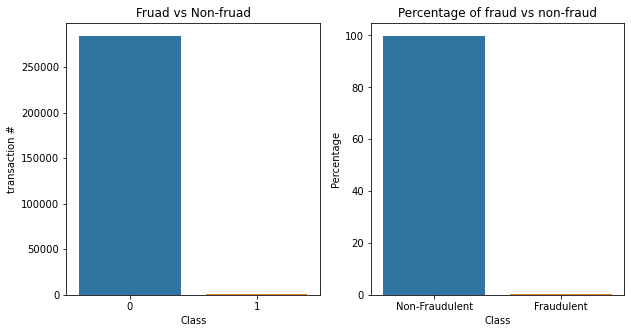

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("transaction #")
plt.xlabel("Class")
plt.title("Fruad vs Non-fruad")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraud vs non-fraud')

plt.show()

##### observation :  This is a class imbalance problem, because the normal transactions are more than 2500000 but the fruad transactions are very less

In [13]:
# Extracting fruad and non-fruad rows
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

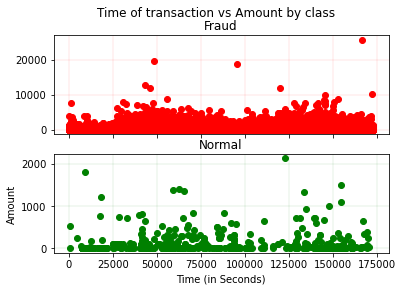

In [14]:
# Create a scatter plot to observe the distribution of classes with time and amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(normal.Time, normal.Amount,color='r')
ax1.set_title('Fraud')
ax1.grid(color='r', linestyle='-', linewidth=0.1)


ax2.scatter(fraud.Time, fraud.Amount,color='g')
ax2.set_title('Normal')
ax2.grid(color='g', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

##### Observation : The fruad transactions have relatively higher number no of transaction amount  than normal as they are denser comparatively

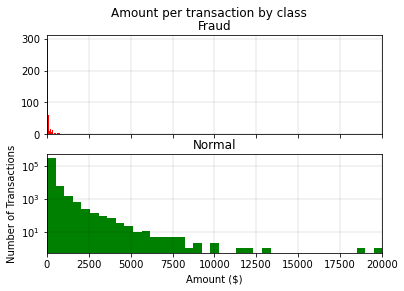

In [15]:
# Bar plot to observe the distribution of classes by amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins,color='r')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)
ax2.hist(normal.Amount, bins = bins,color='g')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

##### Observation : Normal has more number of transactions over Amount when compared to Fraud Transactions.Clearly low amount transactions are more likely to be fraudulent than high amount transaction. Also, it seems that time has no signiface in the data. so we can remove that column

In [16]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

### Splitting the data into train & test data

In [17]:
y= df["Class"] #class variable
X = df.drop("Class", axis = 1)

In [18]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


##### Feature Scaling using Standard Scaler.As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field

In [20]:
scaler = StandardScaler()
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])# Scaling the train data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])# Transforming the test data

In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [22]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


### Plotting the distribution of a variable

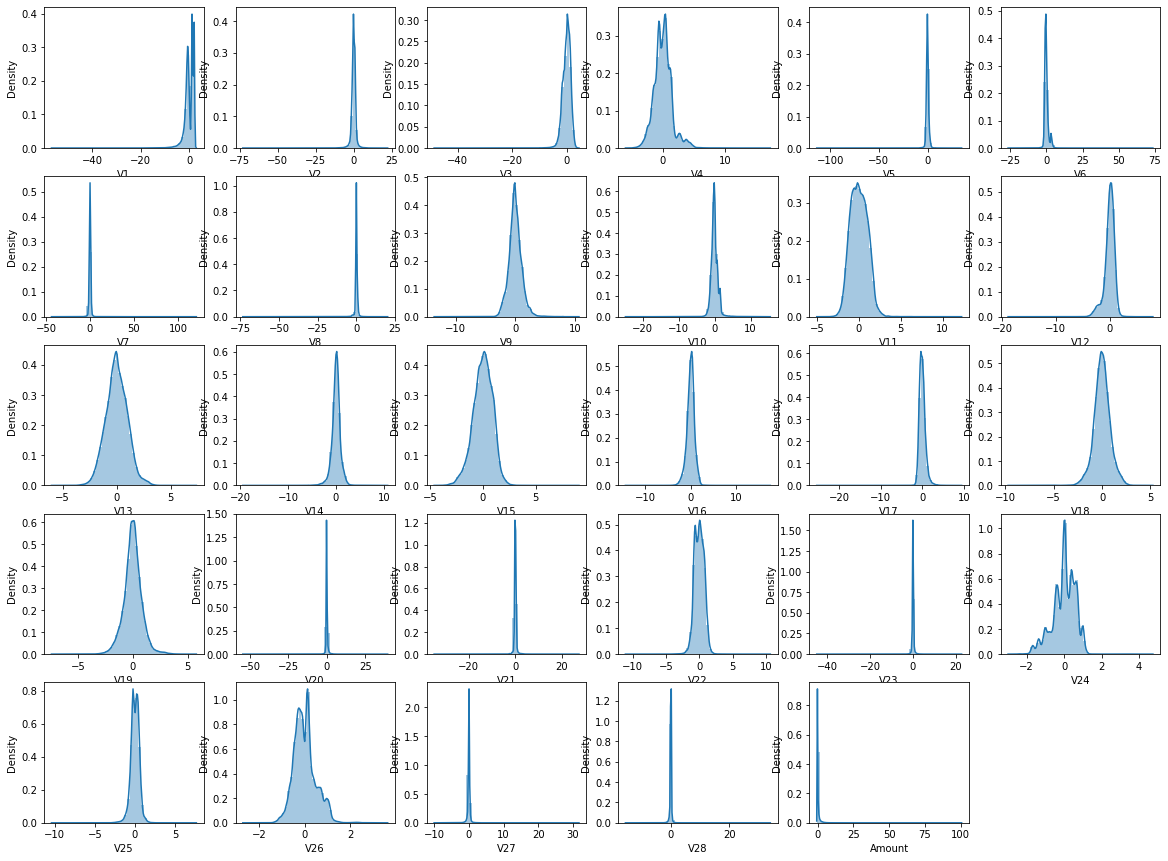

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns
plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col]) # distribution plot for each and every column
plt.show()

It is observed that lot of features are highly skewed. we will check the skewness and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Lets check the skewness of the features
var=X_train.columns
skew_list=[]
for i in var:
    skew_list.append(X_train[i].skew())
tmp=pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,...,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [25]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed=tmp.loc[(tmp["Skewness"]>1)|(tmp["Skewness"]<-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


##### Applyting Power Transformer for above shown feautures which are skewed

In [26]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)
X_train[skewed] = pt.fit_transform(X_train[skewed])# Fitting the power transformer in train data
X_test[skewed] = pt.transform(X_test[skewed])# Transforming the test data

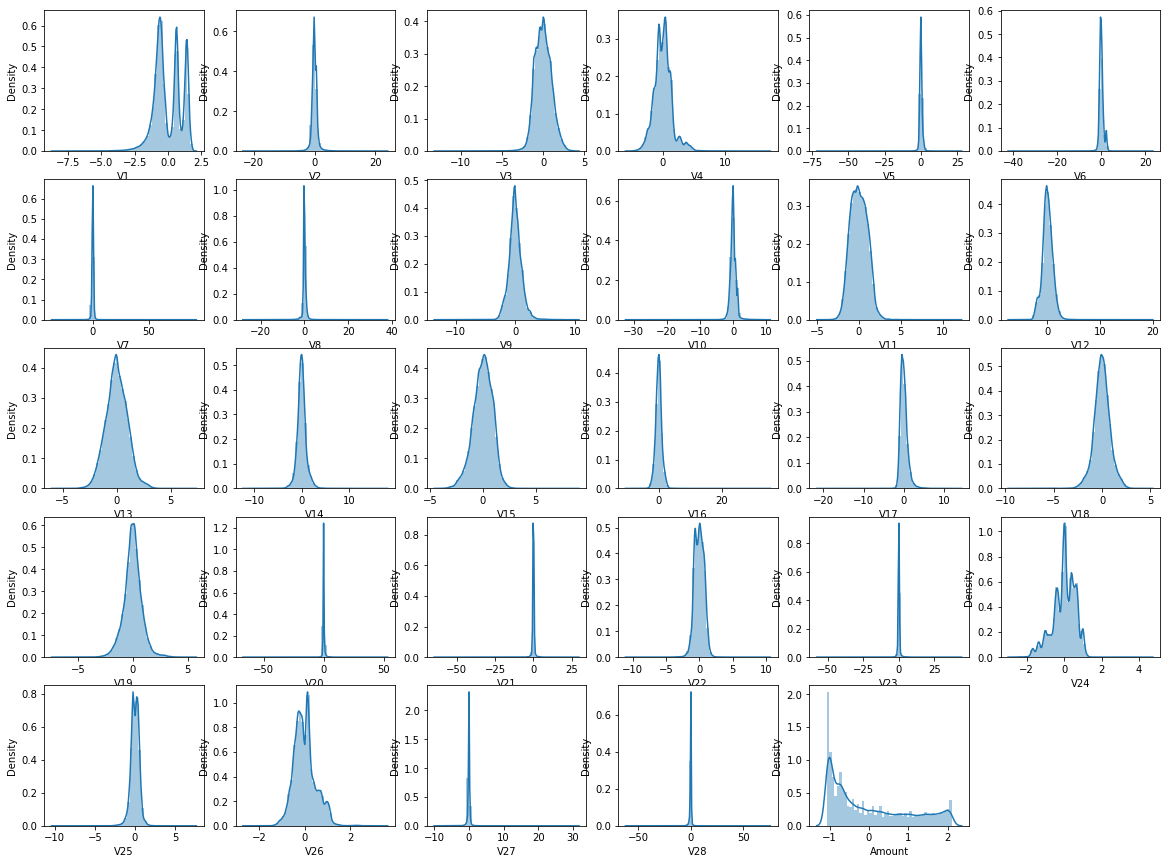

In [27]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns
plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col]) # distribution plot for each and every column
plt.show()

# Logistic Regrassion with Imbalanced data

In [28]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

In [29]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
# Fit the model
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9808868419804181
Best hyperparameters:  {'C': 0.01}


In [30]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.689827,0.051089,0.028560,0.000393,0.01,{'C': 0.01},0.968649,0.987418,0.991888,0.972320,...,0.980887,0.008917,1,0.986560,0.981838,0.980641,0.986508,0.981480,0.983405,0.002584
1,1.083564,0.065075,0.028517,0.000492,0.1,{'C': 0.1},0.969796,0.982755,0.988625,0.964694,...,0.977179,0.008725,2,0.983257,0.978596,0.977881,0.985034,0.979206,0.980795,0.002824
2,1.181857,0.053046,0.028446,0.000351,1,{'C': 1},0.970928,0.981696,0.987179,0.962764,...,0.976174,0.008526,3,0.982013,0.977514,0.977196,0.984493,0.978452,0.979934,0.002851
3,1.190500,0.032909,0.028624,0.000296,10,{'C': 10},0.971130,0.981564,0.986990,0.962537,...,0.976060,0.008497,4,0.981847,0.977373,0.977123,0.984424,0.978355,0.979824,0.002854
4,1.215127,0.091936,0.028670,0.000333,100,{'C': 100},0.971157,0.981549,0.986970,0.962509,...,0.976048,0.008495,5,0.981831,0.977356,0.977118,0.984419,0.978347,0.979814,0.002854
5,1.222107,0.072451,0.027928,0.000415,1000,{'C': 1000},0.971160,0.981549,0.986964,0.962506,...,0.976047,0.008494,6,0.981829,0.977357,0.977113,0.984418,0.978345,0.979812,0.002855


##### Logistic Regression with hyperparameter tuning

In [31]:
model_cv.best_params_

{'C': 0.01}

In [32]:
# Instantiating the model
logreg_imb = LogisticRegression(C=0.01)
# Fitting the model with train data
logreg_imb_model = logreg_imb.fit(X_train, y_train)

#### Evaluating the model on train data

In [33]:
# Predictions on the train set
y_train_pred = logreg_imb_model.predict(X_train)

In [34]:
from sklearn.metrics import accuracy_score
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

# Printing scores
display_scores(y_train, y_train_pred)

F1 Score: 73.76%
Accuracy: 99.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [35]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

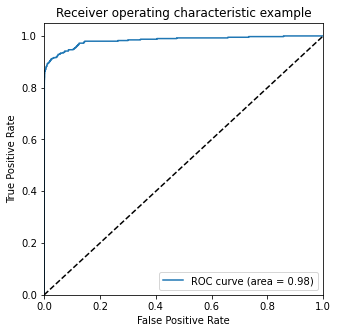

In [36]:
# Predicted probability
y_train_pred_proba = logreg_imb_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating on test data

In [37]:
# Evaluating on test data
y_test_pred = logreg_imb_model.predict(X_test)

In [38]:
# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 70.3%
Accuracy: 99.91%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
# Predicted probability
y_test_pred_proba = logreg_imb_model.predict_proba(X_test)[:,1]

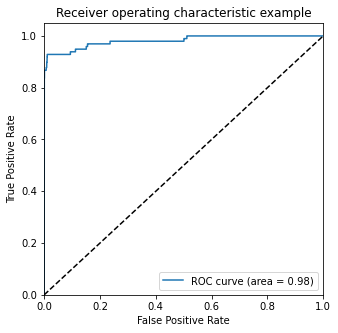

In [40]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.9140%
Recall: 59.1837%


<AxesSubplot:>

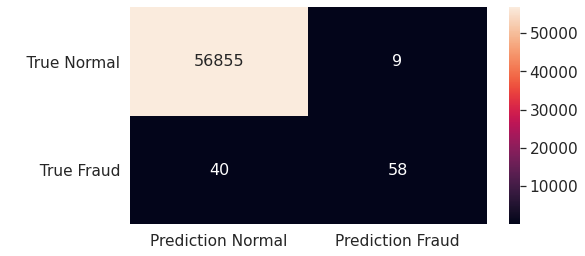

In [41]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
logimb_accuracy = accuracy_score(y_test, y_test_pred)
logimb_recall = recall_score(y_test, y_test_pred)
logimb_cm = confusion_matrix(y_test, y_test_pred)
logimb_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(logimb_accuracy))
print("Recall: {:.4%}".format(logimb_recall))
logimb_cm = pd.DataFrame(logimb_cm, ['    True Normal','  True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(logimb_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using logistic regression model with Imbalanced data, we have observed that accuracy is over 99%. which is obvious for imbalanced dataset but accuracy shouldn't be a primary metric fo imbalanced data . The recall is observed close to 60% .

In [43]:
# creating variables for accuracy and F1 scores for both train and test data
accuracy_train_logimb=round(accuracy_score(y_train, y_train_pred)*100,2)
accuracy_test_logimb=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_logimb=round(f1_score(y_train, y_train_pred)*100,2)
F1_test_logimb=round(f1_score(y_test, y_test_pred)*100,2)

In [44]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_logimb,F1_train_logimb])
print(t)
t.add_row(['Testset',accuracy_test_logimb,F1_test_logimb])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.92   | 73.76 |
+----------+----------+-------+
| Testset  |  99.91   |  70.3 |
+----------+----------+-------+


##### Decision Tree using imbalanced data

In [45]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,15),
    'min_samples_leaf': range(0,100,30),
    'min_samples_split': range(0,100,30),
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

In [46]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15),
                         'min_samples_leaf': range(0, 100, 30),
                         'min_samples_split': range(0, 100, 30)},
             scoring='roc_auc', verbose=1)

In [47]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.097275,0.001892,0.000000,0.000000,5,0,0,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,160
1,0.103828,0.002306,0.000000,0.000000,5,0,30,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,109
2,0.086698,0.006419,0.000000,0.000000,5,0,60,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,111
3,0.084842,0.001452,0.000000,0.000000,5,0,90,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,112
4,0.084511,0.001140,0.000000,0.000000,5,30,0,"{'max_depth': 5, 'min_samples_leaf': 30, 'min_...",NaN,NaN,NaN,NaN,NaN,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,13.802162,1.089182,0.040876,0.001643,14,60,90,"{'max_depth': 14, 'min_samples_leaf': 60, 'min...",0.897739,0.879642,0.941585,0.906322,0.026006,78
156,0.071247,0.000774,0.000000,0.000000,14,90,0,"{'max_depth': 14, 'min_samples_leaf': 90, 'min...",NaN,NaN,NaN,NaN,NaN,110
157,14.584398,0.070968,0.039839,0.000864,14,90,30,"{'max_depth': 14, 'min_samples_leaf': 90, 'min...",0.906716,0.879060,0.912945,0.899574,0.014726,89
158,13.399866,0.936492,0.033159,0.005254,14,90,60,"{'max_depth': 14, 'min_samples_leaf': 90, 'min...",0.913883,0.885909,0.912944,0.904245,0.012971,82


In [48]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9420717979147946
DecisionTreeClassifier(max_depth=8, min_samples_leaf=60, min_samples_split=30)


#### Decision Tree with optimal hyperparameters

In [49]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=8, 
                                  min_samples_leaf=60,
                                  min_samples_split=30)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=60, min_samples_split=30,
                       random_state=100)

#### Prediction on the train set

In [50]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 70.54%
Accuracy: 99.91%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.60      0.71       394

    accuracy                           1.00    227845
   macro avg       0.93      0.80      0.85    227845
weighted avg       1.00      1.00      1.00    227845



In [51]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

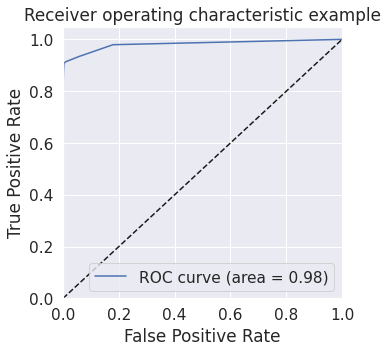

In [52]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [53]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 62.58%
Accuracy: 99.89%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.52      0.63        98

    accuracy                           1.00     56962
   macro avg       0.89      0.76      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [54]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

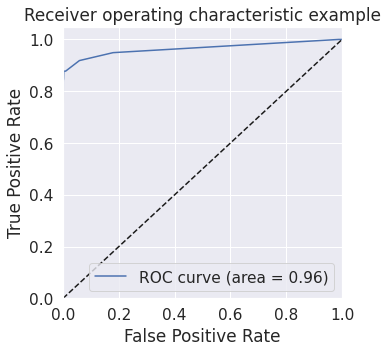

In [55]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.8929%
Recall: 52.0408%


<AxesSubplot:>

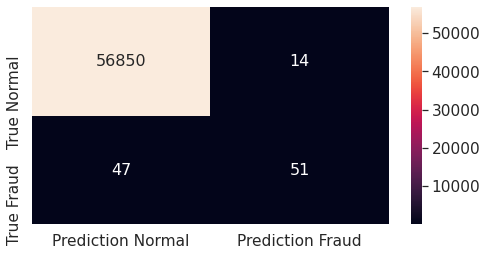

In [56]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
dt_imb_accuracy = accuracy_score(y_test, y_test_pred)
dt_imb_recall = recall_score(y_test, y_test_pred)
dt_imb_cm = confusion_matrix(y_test, y_test_pred)
dt_imb_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(dt_imb_accuracy))
print("Recall: {:.4%}".format(dt_imb_recall))
dt_imb_cm = pd.DataFrame(dt_imb_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_imb_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using decision tree model with optimal Hyper-parameters, we have observed that recall is decreased a bit  compared to logistic regression model and  still test accuracy comes out to be 99.89% . But it is important to note that we are dealing with imbalanced data and accuracy shouldn't considered as primary key metric

In [57]:
accuracy_train_dtimb=round(accuracy_score(y_train, y_train_pred)*100,2)
accuracy_test_dtimb=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_dtimb=round(f1_score(y_train, y_train_pred)*100,2)
F1_test_dtimb=round(f1_score(y_test, y_test_pred)*100,2)

In [58]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_dtimb,F1_train_dtimb])
print(t)
t.add_row(['Testset',accuracy_test_dtimb,F1_test_dtimb])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.91   | 70.54 |
+----------+----------+-------+
| Testset  |  99.89   | 62.58 |
+----------+----------+-------+


# RF using imbalanced data

In [59]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 3),
    'min_samples_leaf': range(50, 150, 20),
    'min_samples_split': range(50, 150, 30),
}

In [60]:
# Instantiate the grid search model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
randomsearchCV = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 5, cv=5,  verbose = True, n_jobs=-1)

In [61]:
# Fit the grid search to the data
randomsearchCV.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 3),
                                        'min_samples_leaf': range(50, 150, 20),
                                        'min_samples_split': range(50, 150, 30)},
                   verbose=True)

In [62]:
# cv results
cv_results = pd.DataFrame(randomsearchCV.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,128.204968,0.498040,0.419162,0.004388,110,90,8,"{'min_samples_split': 110, 'min_samples_leaf':...",0.999144,0.999122,0.999100,0.998947,0.999188,0.999100,0.000082,2
1,171.168822,2.105654,0.511317,0.008297,110,130,11,"{'min_samples_split': 110, 'min_samples_leaf':...",0.999144,0.999078,0.998991,0.998969,0.999078,0.999052,0.000064,5
2,129.728236,0.427688,0.417591,0.006516,80,110,8,"{'min_samples_split': 80, 'min_samples_leaf': ...",0.999144,0.999056,0.999078,0.998969,0.999166,0.999083,0.000070,3
3,172.921824,1.516707,0.468280,0.069589,140,50,11,"{'min_samples_split': 140, 'min_samples_leaf':...",0.999232,0.999188,0.999188,0.999056,0.999298,0.999192,0.000079,1
4,153.603298,14.450409,0.337227,0.004142,50,110,11,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.999144,0.999100,0.998925,0.998969,0.999166,0.999061,0.000097,4


In [63]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", randomsearchCV.best_score_)
print(randomsearchCV.best_estimator_)

Best roc auc score :  0.9991924334525665
RandomForestClassifier(max_depth=11, min_samples_leaf=50, min_samples_split=140)


#### RF with optimal hyperparameters

In [64]:
# Model with optimal hyperparameters
rf_imb_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=8, 
                                  min_samples_leaf=50,
                                  min_samples_split=110)

rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=110,
                       random_state=100)

#### Prediction on the train set

In [65]:
y_train_pred = rf_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 76.46%
Accuracy: 99.93%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.87      0.68      0.76       394

    accuracy                           1.00    227845
   macro avg       0.94      0.84      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [66]:
# Predicted probability
y_train_pred_proba = rf_imb_model.predict_proba(X_train)[:,1]

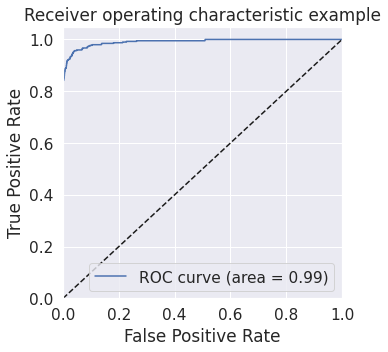

In [67]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [68]:
y_test_pred = rf_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.76%
Accuracy: 99.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.62      0.72        98

    accuracy                           1.00     56962
   macro avg       0.92      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [69]:
# Predicted probability
y_test_pred_proba = rf_imb_model.predict_proba(X_test)[:,1]

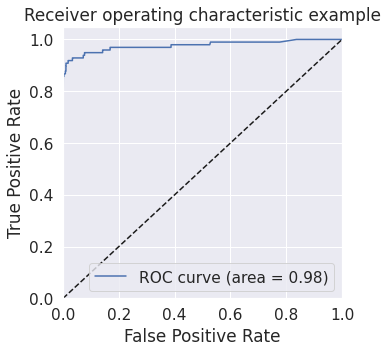

In [70]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.9157%
Recall: 62.2449%


<AxesSubplot:>

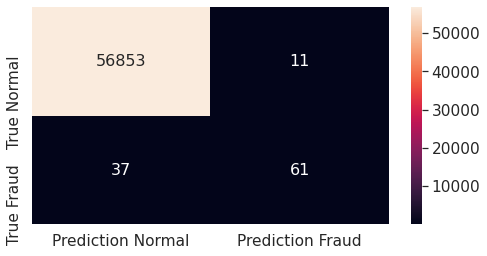

In [71]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
rf_imb_accuracy = accuracy_score(y_test, y_test_pred)
rf_imb_recall = recall_score(y_test, y_test_pred)
rf_imb_cm = confusion_matrix(y_test, y_test_pred)
rf_imb_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(rf_imb_accuracy))
print("Recall: {:.4%}".format(rf_imb_recall))
rf_imb_cm = pd.DataFrame(rf_imb_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_imb_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using random forest model with optimal Hyper-parameters, we have observed that recall is improved  to 62% and test accuracy comes out to be 99.91% . But it is important to note that we are dealing with imbalanced data and accuracy shouldn't considered as primary key metric

In [72]:
accuracy_train_rfimb=round(accuracy_score(y_train, y_train_pred)*100,2)
accuracy_test_rfimb=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_rfimb=round(f1_score(y_train, y_train_pred)*100,2)
F1_test_rfimb=round(f1_score(y_test, y_test_pred)*100,2)

In [73]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_rfimb,F1_train_rfimb])
print(t)
t.add_row(['Testset',accuracy_test_rfimb,F1_test_rfimb])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.93   | 76.46 |
+----------+----------+-------+
| Testset  |  99.92   | 71.76 |
+----------+----------+-------+


# Modelling using GBDT

In [74]:
# assigning various hyper parameters
param_grid =  {"n_estimators": [10,50,100],
       "max_depth": np.arange(5,21),
       "max_features": ["auto", "sqrt"],
       "min_samples_leaf": np.arange(2,16),
       "min_samples_split": np.arange(2,21)}

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
# creating a randomsearch cross validation
randomsearchCV = RandomizedSearchCV(gbc, param_distributions = param_grid, n_iter = 5, cv=3,  verbose = True, n_jobs=-1)

In [75]:
%time
randomsearchCV.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 11 µs
Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                                        'n_estimators': [10, 50, 100]},
                   verbose=True)

In [76]:
randomsearchCV.best_params_

{'n_estimators': 10,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 7}

In [77]:
#Fitting the data with Best Parameters
gbc_imb_tune = GradientBoostingClassifier(n_estimators=10, max_depth = 10, max_features = 'auto', min_samples_leaf =9,
                                     min_samples_split=7)
gbc_imb_tune.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_leaf=9, min_samples_split=7,
                           n_estimators=10)

In [78]:
y_train_pred = gbc_imb_tune.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 84.35%
Accuracy: 99.95%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.79      0.84       394

    accuracy                           1.00    227845
   macro avg       0.95      0.89      0.92    227845
weighted avg       1.00      1.00      1.00    227845



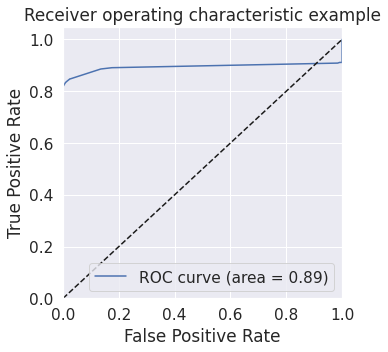

In [79]:
y_train_pred_proba = gbc_imb_tune.predict_proba(X_train)[:,1]# Predicted probability
draw_roc(y_train, y_train_pred_proba)# Plot the ROC curve

##### Evaluating model on test set

In [80]:
y_test_pred = gbc_imb_tune.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.11%
Accuracy: 99.91%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.65      0.71        98

    accuracy                           1.00     56962
   macro avg       0.89      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962



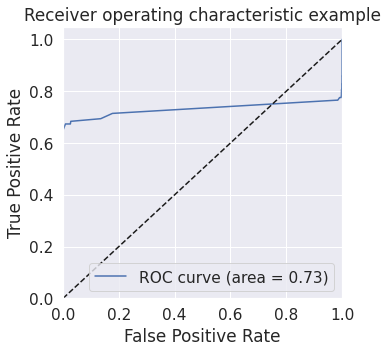

In [81]:
y_test_pred_proba = gbc_imb_tune.predict_proba(X_test)[:,1]# Predicted probability
draw_roc(y_test, y_test_pred_proba)# Plot the ROC curve

##### Confusion Matrix

Accuracy: 99.9087%
Recall: 65.3061%


<AxesSubplot:>

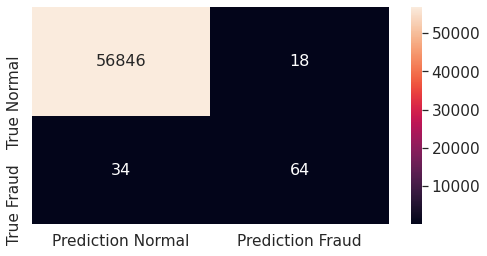

In [82]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
gbc_imb_accuracy = accuracy_score(y_test, y_test_pred)
gbc_imb_recall = recall_score(y_test, y_test_pred)
gbc_imb_cm = confusion_matrix(y_test, y_test_pred)
gbc_imb_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(gbc_imb_accuracy))
print("Recall: {:.4%}".format(gbc_imb_recall))
gbc_imb_cm = pd.DataFrame(gbc_imb_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(gbc_imb_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using GBDT model with optimal Hyper-parameters, we have observed that recall is 74%  and test accuracy comes out to be 99.92% .

In [83]:
accuracy_train_gbcimb=round(accuracy_score(y_train, y_train_pred)*100,2)
accuracy_test_gbcimb=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_gbcimb=round(f1_score(y_train, y_train_pred)*100,2)
F1_test_gbcimb=round(f1_score(y_test, y_test_pred)*100,2)

In [84]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_gbcimb,F1_train_gbcimb])
print(t)
t.add_row(['Testset',accuracy_test_gbcimb,F1_test_gbcimb])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.95   | 84.35 |
+----------+----------+-------+
| Testset  |  99.91   | 71.11 |
+----------+----------+-------+


# XGBoost using imbalanced data

In [85]:
# assigning various hyper parameters
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}

In [86]:
xgb=XGBClassifier()
# creating a randomsearch cross validation
randomsearchCV = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 5, cv=3,  verbose = True, n_jobs=-1)

In [87]:
%time
randomsearchCV.fit(X_train, y_train)

randomsearchCV.best_params_

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[13:36:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 0.6, 'learning_rate': 0.6}

In [88]:
#Fitting the data with Best Parameters
xgb_imb_tune = XGBClassifier(subsample=0.6,learning_rate=0.6)
xgb_imb_tune.fit(X_train, y_train)

[13:36:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
y_train_pred = xgb_imb_tune.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Accuracy: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



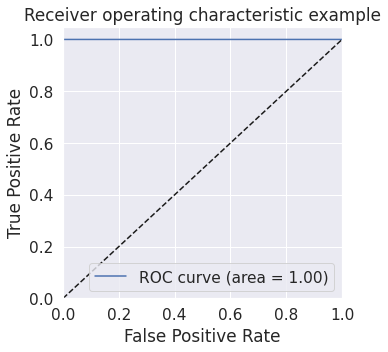

In [90]:
y_train_pred_proba = xgb_imb_tune.predict_proba(X_train)[:,1]# Predicted probability
draw_roc(y_train, y_train_pred_proba)# Plot the ROC curve

##### Evaluating model on test set

In [91]:
y_test_pred = xgb_imb_tune.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.01%
Accuracy: 99.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



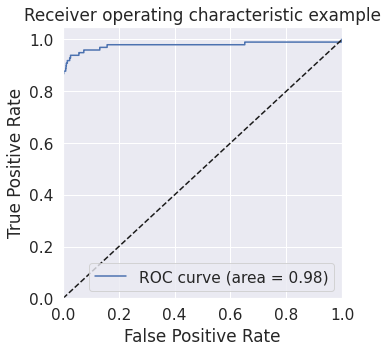

In [92]:
y_test_pred_proba =xgb_imb_tune.predict_proba(X_test)[:,1]# Predicted probability
draw_roc(y_test, y_test_pred_proba)# Plot the ROC curve

##### Confusion Matrix

Accuracy: 99.9596%
Recall: 78.5714%


<AxesSubplot:>

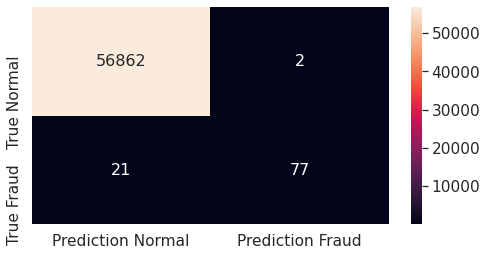

In [93]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
xgb_imb_accuracy = accuracy_score(y_test, y_test_pred)
xgb_imb_recall = recall_score(y_test, y_test_pred)
xgb_imb_cm = confusion_matrix(y_test, y_test_pred)
xgb_imb_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(xgb_imb_accuracy))
print("Recall: {:.4%}".format(xgb_imb_recall))
xgb_imb_cm = pd.DataFrame(xgb_imb_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgb_imb_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using XGB model with optimal Hyper-parameters, we have observed that recall is greatly improved to 78% and test accuracy comes out to be 99.95% . But it is important to note that we are dealing with imbalanced data and accuracy shouldn't considered as primary key metric

In [94]:
accuracy_train_xgbimb=round(accuracy_score(y_train, y_train_pred)*100,2)
accuracy_test_xgbimb=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_xgbimb=round(f1_score(y_train, y_train_pred)*100,2)
F1_test_xgbimb=round(f1_score(y_test, y_test_pred)*100,2)

In [95]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_xgbimb,F1_train_xgbimb])
print(t)
t.add_row(['Testset',accuracy_test_xgbimb,F1_test_xgbimb])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  100.0   | 100.0 |
+----------+----------+-------+
| Testset  |  99.96   | 87.01 |
+----------+----------+-------+


## Model Building
- Build different models on the balanced dataset and see the result

### up sampling the data using Random Oversampling

In [96]:
! pip install imblearn

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 206 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 82.3 MB/s eta 0:00:01
distutils: /home/ubuntu/.local/include/python3.8/UNKNOWN
sysconfig: /home/ubuntu/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [97]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)


In [98]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


##### Logistic Regrassion with Random Oversampling

In [99]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9869503128338609
Best hyperparameters:  {'C': 10}


In [100]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.047807,0.153857,0.052210,0.000755,0.01,{'C': 0.01},0.986508,0.986269,0.987361,0.986853,...,0.986802,0.000383,6,0.986908,0.986890,0.986661,0.986796,0.986822,0.986815,0.000088
1,2.271450,0.166176,0.051650,0.000649,0.1,{'C': 0.1},0.986649,0.986399,0.987485,0.986985,...,0.986934,0.000380,5,0.987042,0.987022,0.986788,0.986922,0.986960,0.986947,0.000090
2,2.287946,0.180917,0.052108,0.000420,1,{'C': 1},0.986665,0.986414,0.987500,0.986998,...,0.986949,0.000380,4,0.987055,0.987038,0.986801,0.986935,0.986974,0.986960,0.000091
3,2.290730,0.105954,0.052161,0.000429,10,{'C': 10},0.986666,0.986415,0.987501,0.986999,...,0.986950,0.000380,1,0.987055,0.987039,0.986802,0.986936,0.986976,0.986962,0.000091
4,2.307601,0.098426,0.051284,0.000545,100,{'C': 100},0.986666,0.986416,0.987501,0.986999,...,0.986950,0.000379,3,0.987056,0.987039,0.986802,0.986936,0.986976,0.986962,0.000091
5,2.320114,0.094422,0.051278,0.001091,1000,{'C': 1000},0.986666,0.986416,0.987501,0.986999,...,0.986950,0.000379,2,0.987056,0.987039,0.986802,0.986936,0.986977,0.986962,0.000091


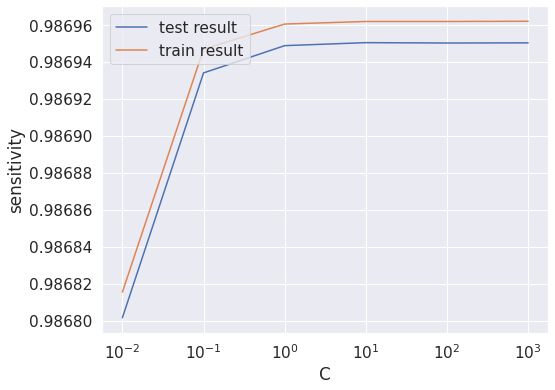

In [101]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

##### Logistic Regression with hyperparameter tuning

In [102]:
model_cv.best_params_

{'C': 10}

In [103]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)
# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [104]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [105]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.31%
Accuracy: 94.47%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



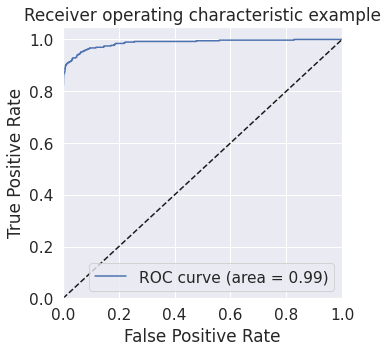

In [106]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [107]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

In [108]:
# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.48%
Accuracy: 97.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [109]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

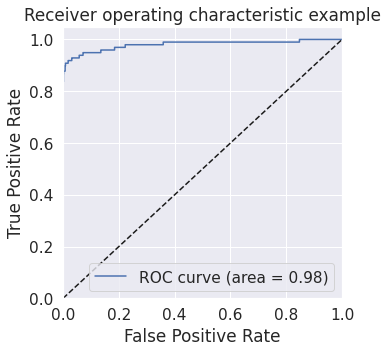

In [110]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 97.3000%
Recall: 91.8367%


<AxesSubplot:>

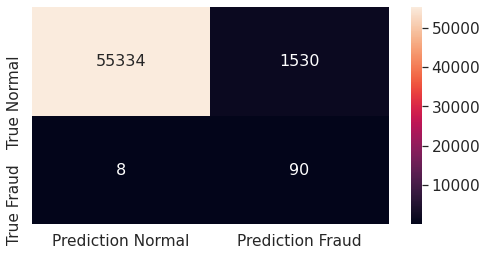

In [111]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
logover_accuracy = accuracy_score(y_test, y_test_pred)
logover_recall = recall_score(y_test, y_test_pred)
logover_cm = confusion_matrix(y_test, y_test_pred)
logover_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(logover_accuracy))
print("Recall: {:.4%}".format(logover_recall))
logover_cm = pd.DataFrame(logover_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(logover_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using logistic regression model with Random over sampling, we have observed that accuracy is bit reduced compared to imbalanced data. which is a good sign.  in the similar lines, recall is improved over 90%.

In [112]:
accuracy_train_logover=round(accuracy_score(y_over, y_train_pred)*100,2)
accuracy_test_logover=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_logover=round(f1_score(y_over, y_train_pred)*100,2)
F1_test_logover=round(f1_score(y_test, y_test_pred)*100,2)

In [113]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_logover,F1_train_logover])
print(t)
t.add_row(['Testset',accuracy_test_logover,F1_test_logover])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  94.47   | 94.31 |
+----------+----------+-------+
| Testset  |   97.3   | 10.48 |
+----------+----------+-------+


## Decision Tree using random oversampling

In [114]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,15),
    'min_samples_leaf': range(0,20,4),
    'min_samples_split': range(0,20,4),
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

In [115]:
# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15),
                         'min_samples_leaf': range(0, 20, 4),
                         'min_samples_split': range(0, 20, 4)},
             scoring='roc_auc', verbose=1)

In [116]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.166302,0.014501,0.000000,0.000000,5,0,0,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,250
1,0.161767,0.012684,0.000000,0.000000,5,0,4,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,175
2,0.171424,0.011916,0.000000,0.000000,5,0,8,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,177
3,0.155649,0.001983,0.000000,0.000000,5,0,12,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,190
4,0.158200,0.001183,0.000000,0.000000,5,0,16,"{'max_depth': 5, 'min_samples_leaf': 0, 'min_s...",NaN,NaN,NaN,NaN,NaN,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.131274,0.000411,0.000000,0.000000,14,16,0,"{'max_depth': 14, 'min_samples_leaf': 16, 'min...",NaN,NaN,NaN,NaN,NaN,166
246,13.388978,0.458787,0.074855,0.001394,14,16,4,"{'max_depth': 14, 'min_samples_leaf': 16, 'min...",0.999656,0.999711,0.999571,0.999646,0.000058,13
247,13.190251,0.315792,0.077071,0.002004,14,16,8,"{'max_depth': 14, 'min_samples_leaf': 16, 'min...",0.999654,0.999704,0.999568,0.999642,0.000056,16
248,13.049158,0.328615,0.064566,0.008705,14,16,12,"{'max_depth': 14, 'min_samples_leaf': 16, 'min...",0.999641,0.999689,0.999569,0.999633,0.000049,18


In [117]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9996787126611798
DecisionTreeClassifier(max_depth=14, min_samples_leaf=12, min_samples_split=16)


#### Decision Tree with optimal hyperparameters

In [118]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=14, 
                                  min_samples_leaf=12,
                                  min_samples_split=4)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=12, min_samples_split=4,
                       random_state=100)

#### Prediction on the train set

In [119]:
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.88%
Accuracy: 99.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [120]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]

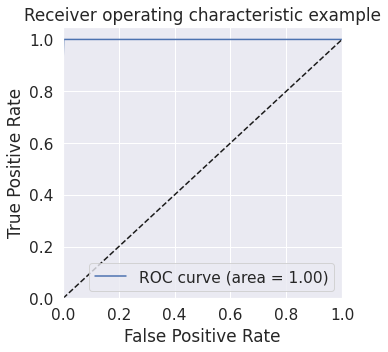

In [121]:
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating the model on the test set

In [122]:
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 45.43%
Accuracy: 99.68%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.79      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.89      0.73     56962
weighted avg       1.00      1.00      1.00     56962



In [123]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]

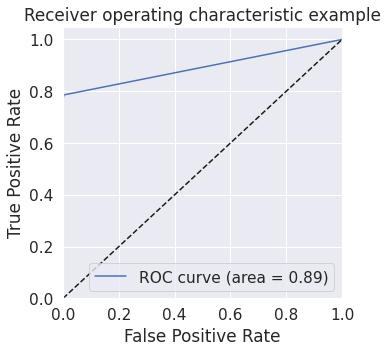

In [124]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.6752%
Recall: 78.5714%


<AxesSubplot:>

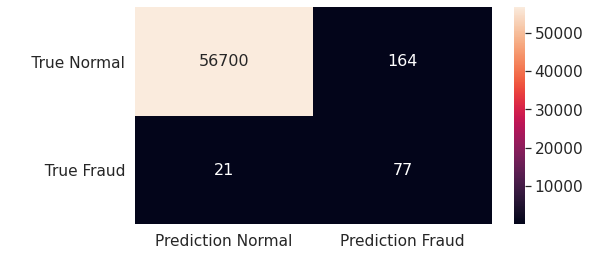

In [125]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
dt_over_accuracy = accuracy_score(y_test, y_test_pred)
dt_over_recall = recall_score(y_test, y_test_pred)
dt_over_cm = confusion_matrix(y_test, y_test_pred)
dt_over_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(dt_over_accuracy))
print("Recall: {:.4%}".format(dt_over_recall))
dt_over_cm = pd.DataFrame(dt_over_cm, ['     True Normal','  True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_over_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using decision tree model with optimal Hyper-parameters, we have observed that recall is greatly improved  to 78% and test accuracy comes out to be 99.67% .

## RF using random oversampling

In [126]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 3),
    'min_samples_leaf': range(50, 150, 20),
    'min_samples_split': range(50, 150, 30),
}

In [127]:
# Instantiate the grid search model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
randomsearchCV = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 5, cv=5,  verbose = True, n_jobs=-1)

In [128]:
# Fit the grid search to the data
randomsearchCV.fit(X_over,y_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 3),
                                        'min_samples_leaf': range(50, 150, 20),
                                        'min_samples_split': range(50, 150, 30)},
                   verbose=True)

In [129]:
# cv results
cv_results = pd.DataFrame(randomsearchCV.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,199.314674,1.387658,1.272949,0.041213,140,50,14,"{'min_samples_split': 140, 'min_samples_leaf':...",0.999538,0.999637,0.999692,0.999615,0.999714,0.999639,0.000062,1
1,201.305889,3.477342,1.260064,0.011294,80,50,14,"{'min_samples_split': 80, 'min_samples_leaf': ...",0.999604,0.999626,0.999670,0.999582,0.999681,0.999633,0.000038,2
2,160.146001,2.490358,1.003544,0.014669,140,90,8,"{'min_samples_split': 140, 'min_samples_leaf':...",0.983931,0.984238,0.985096,0.983458,0.982491,0.983843,0.000861,4
3,156.201992,4.825029,0.725652,0.144657,80,50,8,"{'min_samples_split': 80, 'min_samples_leaf': ...",0.984052,0.983227,0.984997,0.985074,0.984106,0.984291,0.000683,3
4,104.454416,10.290469,0.720473,0.107666,50,90,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.957618,0.953891,0.967366,0.959453,0.956705,0.959007,0.004549,5


In [130]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", randomsearchCV.best_score_)
print(randomsearchCV.best_estimator_)

Best roc auc score :  0.9996394830168123
RandomForestClassifier(max_depth=14, min_samples_leaf=50, min_samples_split=140)


#### RF with optimal hyperparameters

In [131]:
# Model with optimal hyperparameters
rf_over_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=14, 
                                  min_samples_leaf=90,
                                  min_samples_split=140)

rf_over_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=14, min_samples_leaf=90, min_samples_split=140,
                       random_state=100)

#### Prediction on the train set

In [132]:
y_train_pred = rf_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.96%
Accuracy: 99.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [133]:
# Predicted probability
y_train_pred_proba = rf_over_model.predict_proba(X_over)[:,1]

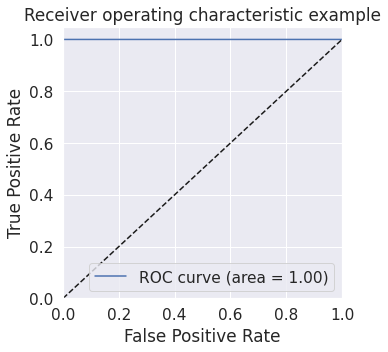

In [134]:
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating the model on the test set

In [135]:
y_test_pred = rf_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 77.48%
Accuracy: 99.91%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.88      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [136]:
# Predicted probability
y_test_pred_proba = rf_over_model.predict_proba(X_test)[:,1]

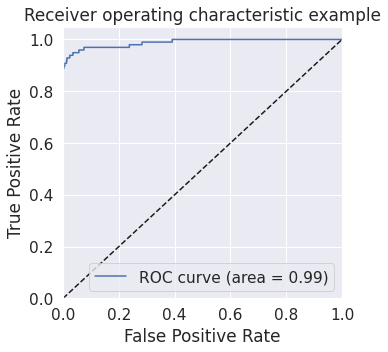

In [137]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.9122%
Recall: 87.7551%


<AxesSubplot:>

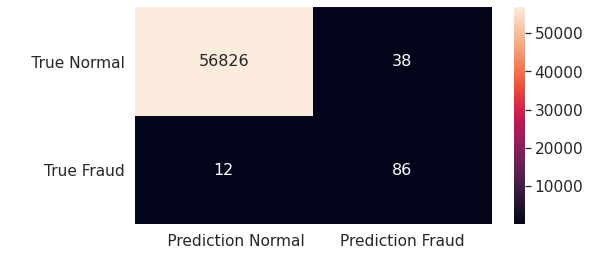

In [138]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
rf_over_accuracy = accuracy_score(y_test, y_test_pred)
rf_over_recall = recall_score(y_test, y_test_pred)
rf_over_cm = confusion_matrix(y_test, y_test_pred)
rf_over_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(rf_over_accuracy))
print("Recall: {:.4%}".format(rf_over_recall))
rf_over_cm = pd.DataFrame(rf_over_cm, ['     True Normal','True Fraud'],['     Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_over_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Random forest model with optimal Hyper-parameters, we have observed that recall is greatly observed as 86% and test accuracy comes out to be 99.91% .

In [139]:
accuracy_train_rfover=round(accuracy_score(y_over, y_train_pred)*100,2)
accuracy_test_rfover=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_rfover=round(f1_score(y_over, y_train_pred)*100,2)
F1_test_rfover=round(f1_score(y_test, y_test_pred)*100,2)

In [140]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_rfover,F1_train_rfover])
print(t)
t.add_row(['Testset',accuracy_test_rfover,F1_test_rfover])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.96   | 99.96 |
+----------+----------+-------+
| Testset  |  99.91   | 77.48 |
+----------+----------+-------+


# Modelling using GBDT

In [141]:
# assigning various hyper parameters
param_grid =  {"n_estimators": [10,50,100],
       "max_depth": np.arange(5,21),
       "max_features": ["auto", "sqrt"],
       "min_samples_leaf": np.arange(2,16),
       "min_samples_split": np.arange(2,21)}

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
# creating a randomsearch cross validation
randomsearchCV = RandomizedSearchCV(gbc, param_distributions = param_grid, n_iter = 5, cv=3,  verbose = True, n_jobs=-1)

In [143]:
%time
randomsearchCV.fit(X_over, y_over)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs
Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                                        'n_estimators': [10, 50, 100]},
                   verbose=True)

In [144]:
randomsearchCV.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 18}

In [145]:
#Fitting the data with Best Parameters
gbc_over_tune = GradientBoostingClassifier(n_estimators=50, max_depth = 20, max_features = 'sqrt', min_samples_leaf =12,
                                     min_samples_split=17)
gbc_over_tune.fit(X_over, y_over)

GradientBoostingClassifier(max_depth=20, max_features='sqrt',
                           min_samples_leaf=12, min_samples_split=17,
                           n_estimators=50)

In [146]:
y_train_pred = gbc_over_tune.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Accuracy: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



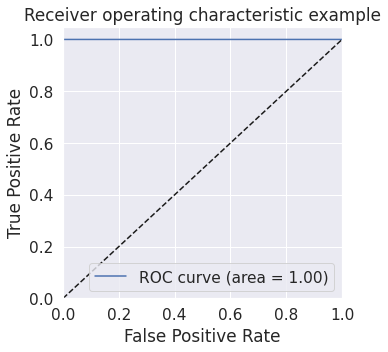

In [147]:
y_train_pred_proba = gbc_over_tune.predict_proba(X_over)[:,1]# Predicted probability
draw_roc(y_over, y_train_pred_proba)# Plot the ROC curve

##### Evaluating model on test set

In [148]:
y_test_pred = gbc_over_tune.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 86.96%
Accuracy: 99.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



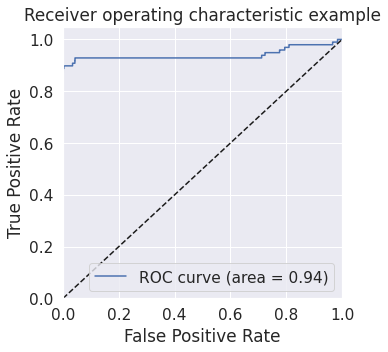

In [149]:
y_test_pred_proba = gbc_over_tune.predict_proba(X_test)[:,1]# Predicted probability
draw_roc(y_test, y_test_pred_proba)# Plot the ROC curve

##### Confusion Matrix

Accuracy: 99.9579%
Recall: 81.6327%


<AxesSubplot:>

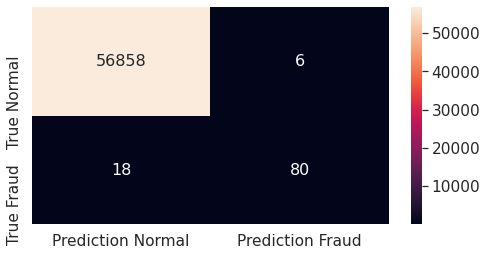

In [150]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
gbc_over_accuracy = accuracy_score(y_test, y_test_pred)
gbc_over_recall = recall_score(y_test, y_test_pred)
gbc_over_cm = confusion_matrix(y_test, y_test_pred)
gbc_over_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(gbc_over_accuracy))
print("Recall: {:.4%}".format(gbc_over_recall))
gbc_over_cm = pd.DataFrame(gbc_over_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(gbc_over_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Gradient boosted Decision tree model with optimal Hyper-parameters, we have observed that both test accuracy and recall is 99% and 80% respectively

In [151]:
accuracy_train_gbcover=round(accuracy_score(y_over, y_train_pred)*100,2)
accuracy_test_gbcover=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_gbcover=round(f1_score(y_over, y_train_pred)*100,2)
F1_test_gbcover=round(f1_score(y_test, y_test_pred)*100,2)

In [152]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_gbcover,F1_train_gbcover])
print(t)
t.add_row(['Testset',accuracy_test_gbcover,F1_test_gbcover])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  100.0   | 100.0 |
+----------+----------+-------+
| Testset  |  99.96   | 86.96 |
+----------+----------+-------+


# XGBoost using Random oversampling

In [153]:
# assigning various hyper parameters
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}

xgb=XGBClassifier()
# creating a randomsearch cross validation
randomsearchCV = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 5, cv=3,  verbose = True, n_jobs=-1)

In [154]:
%time
randomsearchCV.fit(X_over, y_over)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.39 µs
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[14:33:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [155]:
randomsearchCV.best_params_

{'subsample': 0.9, 'learning_rate': 0.6}

In [156]:
#Fitting the data with Best Parameters
xgb_over_tune = XGBClassifier(min_samples_split= 7,min_samples_leaf= 11,max_features= 'sqrt',
 max_depth= 11,n_estimators= 100)
xgb_over_tune.fit(X_over, y_over)

[14:33:49] WARNING: ../src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:33:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=11,
              max_features='sqrt', min_child_weight=1, min_samples_leaf=11,
              min_samples_split=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
y_train_pred = xgb_over_tune.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Accuracy: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



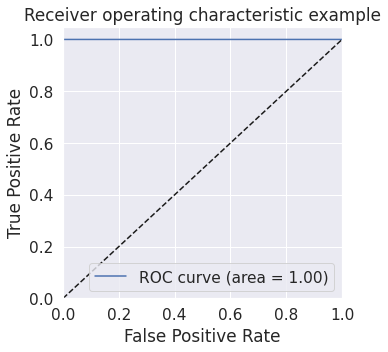

In [158]:
y_train_pred_proba = xgb_over_tune.predict_proba(X_over)[:,1]# Predicted probability
draw_roc(y_over, y_train_pred_proba)# Plot the ROC curve

##### Evaluating model on test set

In [159]:
y_test_pred = xgb_over_tune.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 88.4%
Accuracy: 99.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.82      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



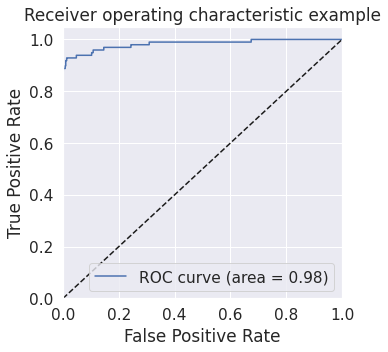

In [160]:
y_test_pred_proba =xgb_over_tune.predict_proba(X_test)[:,1]# Predicted probability
draw_roc(y_test, y_test_pred_proba)# Plot the ROC curve

##### Confusion Matrix

Accuracy: 99.9631%
Recall: 81.6327%


<AxesSubplot:>

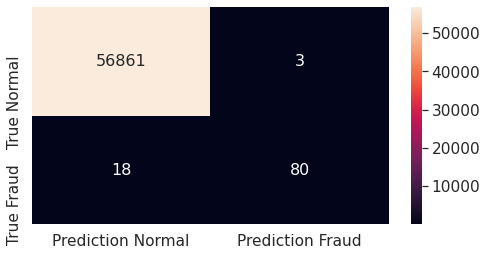

In [161]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
xgb_over_accuracy = accuracy_score(y_test, y_test_pred)
xgb_over_recall = recall_score(y_test, y_test_pred)
xgb_over_cm = confusion_matrix(y_test, y_test_pred)
xgb_over_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(xgb_over_accuracy))
print("Recall: {:.4%}".format(xgb_over_recall))
xgb_over_cm = pd.DataFrame(xgb_over_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgb_over_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using XGB tree model with optimal Hyper-parameters on Random over-sampled data, we have observed that recall as 86%  and test accuracy comes out to be 99.91% .

In [162]:
accuracy_train_xgbover=round(accuracy_score(y_over, y_train_pred)*100,2)
accuracy_test_xgbover=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_xgbover=round(f1_score(y_over, y_train_pred)*100,2)
F1_test_xgbover=round(f1_score(y_test, y_test_pred)*100,2)

In [163]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_xgbover,F1_train_xgbover])
print(t)
t.add_row(['Testset',accuracy_test_xgbover,F1_test_xgbover])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  100.0   | 100.0 |
+----------+----------+-------+
| Testset  |  99.96   |  88.4 |
+----------+----------+-------+


### Print the class distribution after applying SMOTE 

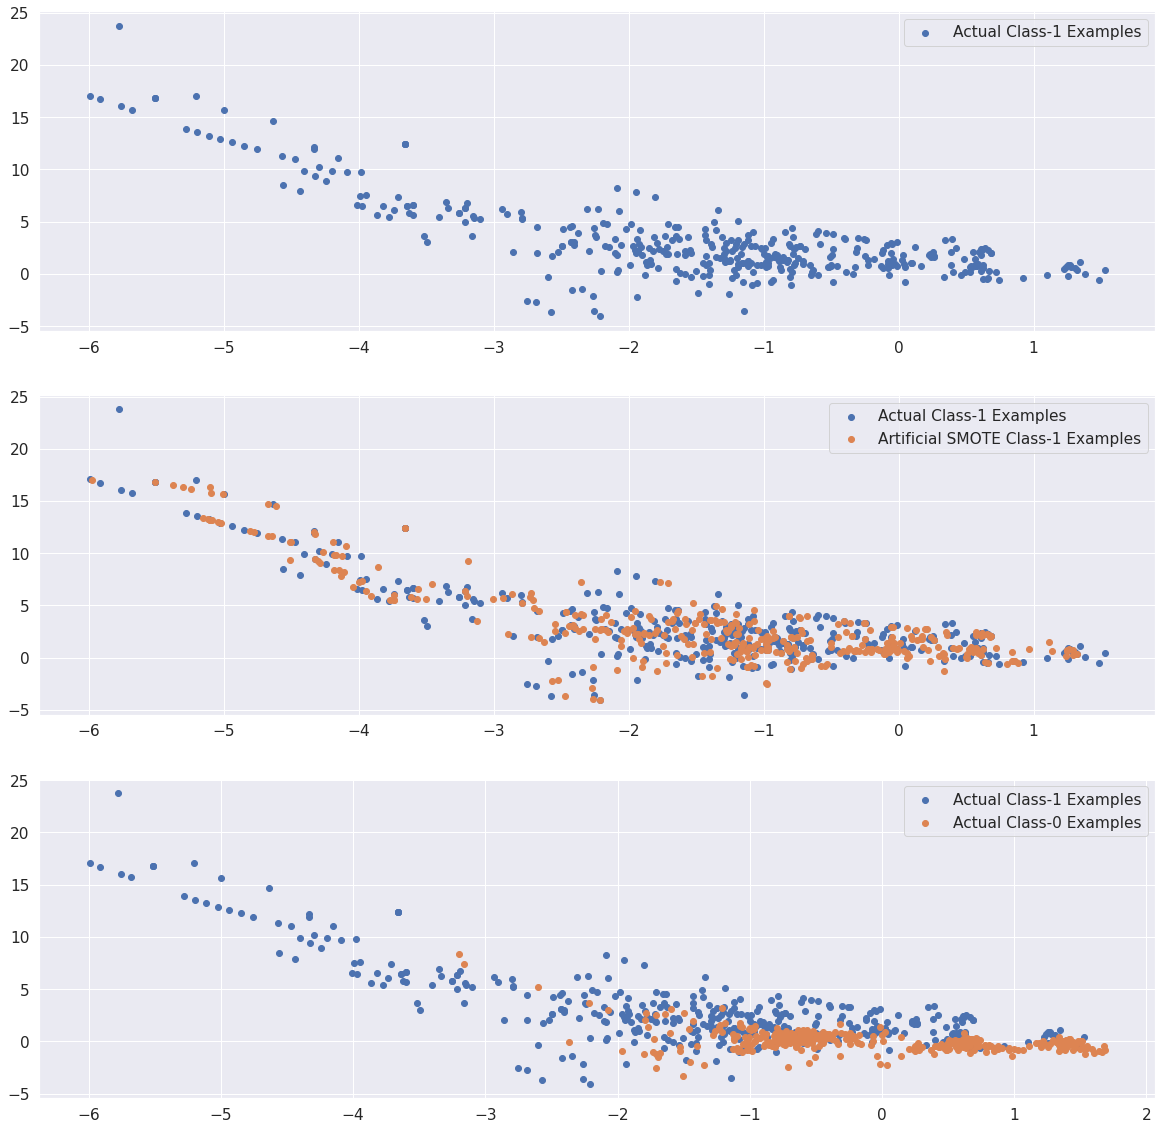

In [164]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Logistic Regression using SMOTE

##### Logistic Regression with hyperparameter tuning

In [165]:
# Instantiating the model
logreg_smote = LogisticRegression(C=100)
# Fitting the model with train data
logreg_smote_model = logreg_smote.fit(X_train_smote, y_train_smote)

#### Evaluating the model on train data

In [166]:
# Predictions on the train set
y_train_pred = logreg_smote_model.predict(X_train_smote)

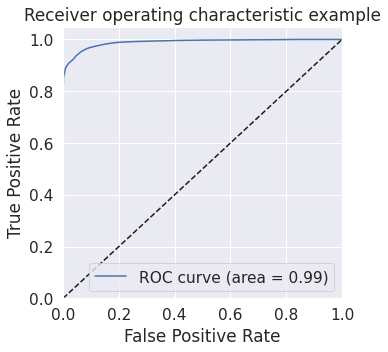

In [167]:
# Predicted probability
y_train_pred_proba = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating on test data

In [168]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)

In [169]:
# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 9.79%
Accuracy: 97.09%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [170]:
# Predicted probability
y_test_pred_proba = logreg_smote_model.predict_proba(X_test)[:,1]

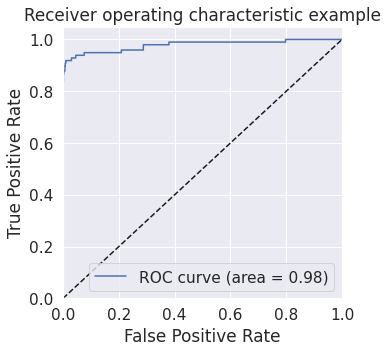

In [171]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 97.0893%
Recall: 91.8367%


<AxesSubplot:>

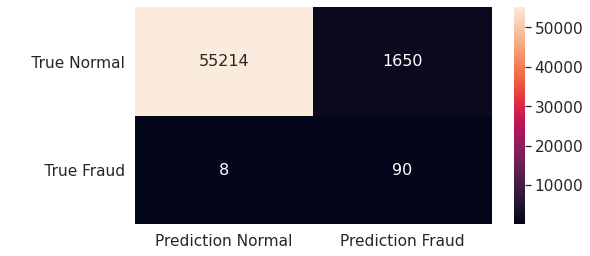

In [172]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
log_smote_accuracy = accuracy_score(y_test, y_test_pred)
log_smote_recall = recall_score(y_test, y_test_pred)
log_smote_cm = confusion_matrix(y_test, y_test_pred)
log_smote_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(log_smote_accuracy))
print("Recall: {:.4%}".format(log_smote_recall))
log_smote_cm = pd.DataFrame(log_smote_cm, ['     True Normal','     True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(log_smote_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Logistic Regression model with optimal Hyper-parameters for Smote sampled data, we have observed that recall is 91% and test accuracy comes out to be 97% . 

In [173]:
accuracy_train_logsmote=round(accuracy_score(y_train_smote, y_train_pred)*100,2)
accuracy_test_logsmote=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_logsmote=round(f1_score(y_train_smote, y_train_pred)*100,2)
F1_test_logsmote=round(f1_score(y_test, y_test_pred)*100,2)

In [174]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_logsmote,F1_train_logsmote])
print(t)
t.add_row(['Testset',accuracy_test_logsmote,F1_test_logsmote])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  94.39   | 94.23 |
+----------+----------+-------+
| Testset  |  97.09   |  9.79 |
+----------+----------+-------+


# Decision tree using SMOTE

#### Decision Tree with optimal hyperparameters

In [175]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=14, 
                                  min_samples_leaf=18,
                                  min_samples_split=15)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=18, min_samples_split=15,
                       random_state=100)

#### Prediction on the train set

In [176]:
y_train_pred = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.54%
Accuracy: 99.54%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [177]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]

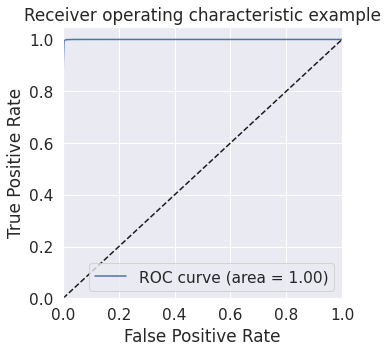

In [178]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [179]:
y_test_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 26.71%
Accuracy: 99.21%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.84      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [180]:
# Predicted probability
y_test_pred_proba = dt_smote_model.predict_proba(X_test)[:,1]

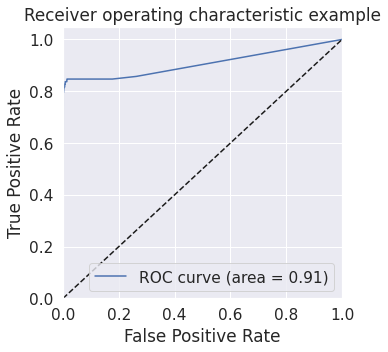

In [181]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.2100%
Recall: 83.6735%


<AxesSubplot:>

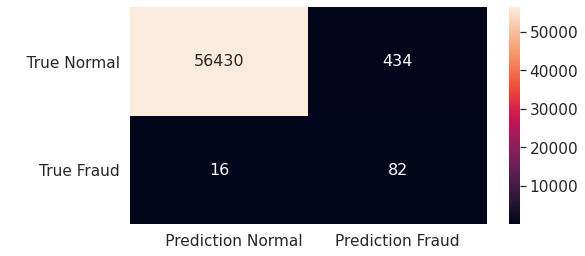

In [182]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
dt_smote_accuracy = accuracy_score(y_test, y_test_pred)
dt_smote_recall = recall_score(y_test, y_test_pred)
dt_smote_cm = confusion_matrix(y_test, y_test_pred)
dt_smote_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(dt_smote_accuracy))
print("Recall: {:.4%}".format(dt_smote_recall))
dt_smote_cm = pd.DataFrame(dt_smote_cm, ['    True Normal','True Fraud'],['      Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_smote_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Decision tree model with optimal Hyper-parameters for smote modelled data, we have observed that recall is 83%  and test accuracy comes out to be 99.21% . 

In [183]:
accuracy_train_dtsmote=round(accuracy_score(y_train_smote, y_train_pred)*100,2)
accuracy_test_dtsmote=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_dtsmote=round(f1_score(y_train_smote, y_train_pred)*100,2)
F1_test_dtsmote=round(f1_score(y_test, y_test_pred)*100,2)

In [184]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_dtsmote,F1_train_dtsmote])
print(t)
t.add_row(['Testset',accuracy_test_dtsmote,F1_test_dtsmote])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.54   | 99.54 |
+----------+----------+-------+
| Testset  |  99.21   | 26.71 |
+----------+----------+-------+


# Random forest using smote

#### RF with optimal hyperparameters

In [185]:
# Model with optimal hyperparameters
rf_smote_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=14, 
                                  min_samples_leaf=90,
                                  min_samples_split=110)
rf_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=14, min_samples_leaf=90, min_samples_split=110,
                       random_state=100)

#### Prediction on the train set

In [186]:
y_train_pred = rf_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.59%
Accuracy: 99.59%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    227451
           1       1.00      0.99      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [187]:
# Predicted probability
y_train_pred_proba = rf_smote_model.predict_proba(X_train_smote)[:,1]

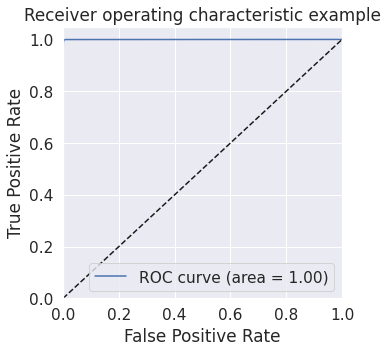

In [188]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [189]:
y_test_pred = rf_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 61.05%
Accuracy: 99.81%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.89      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [190]:
# Predicted probability
y_test_pred_proba = rf_smote_model.predict_proba(X_test)[:,1]

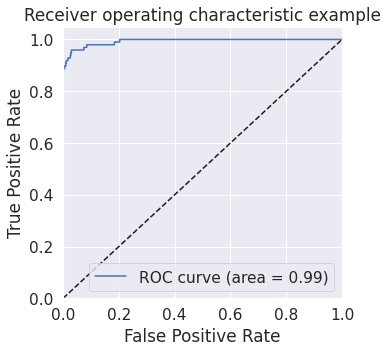

In [191]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.8051%
Recall: 88.7755%


<AxesSubplot:>

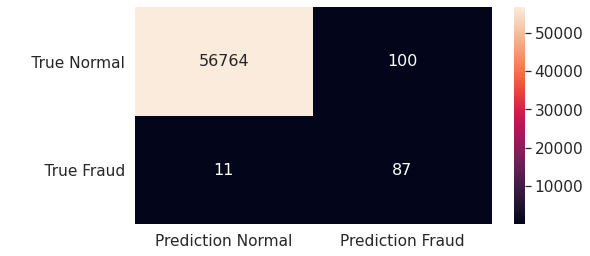

In [192]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
rf_smote_accuracy = accuracy_score(y_test, y_test_pred)
rf_smote_recall = recall_score(y_test, y_test_pred)
rf_smote_cm = confusion_matrix(y_test, y_test_pred)
rf_smote_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(rf_smote_accuracy))
print("Recall: {:.4%}".format(rf_smote_recall))
rf_smote_cm = pd.DataFrame(rf_smote_cm, ['     True Normal','    True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_smote_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Random forest model with optimal Hyper-parameters, we have observed that recall 88%  and test accuracy comes out to be 99.8% .

In [193]:
accuracy_train_rfsmote=round(accuracy_score(y_train_smote, y_train_pred)*100,2)
accuracy_test_rfsmote=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_rfsmote=round(f1_score(y_train_smote, y_train_pred)*100,2)
F1_test_rfsmote=round(f1_score(y_test, y_test_pred)*100,2)

In [194]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_rfsmote,F1_train_rfsmote])
print(t)
t.add_row(['Testset',accuracy_test_rfsmote,F1_test_rfsmote])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.59   | 99.59 |
+----------+----------+-------+
| Testset  |  99.81   | 61.05 |
+----------+----------+-------+


# XGBoost using Smote

In [195]:
#Fitting the data with Best Parameters
xgb_smote_tune = XGBClassifier(subsample=0.9,learning_rate=0.6)
xgb_smote_tune.fit(X_train_smote, y_train_smote)

[14:40:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [196]:
y_train_pred = xgb_smote_tune.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Accuracy: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



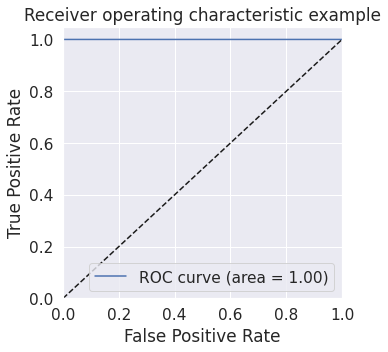

In [197]:
y_train_pred_proba = xgb_smote_tune.predict_proba(X_train_smote)[:,1]# Predicted probability
draw_roc(y_train_smote, y_train_pred_proba)# Plot the ROC curve

##### Evaluating model on test set

In [198]:
y_test_pred = xgb_smote_tune.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 83.0%
Accuracy: 99.94%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



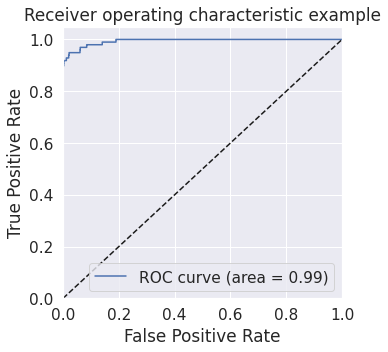

In [199]:
y_test_pred_proba =xgb_smote_tune.predict_proba(X_test)[:,1]# Predicted probability
draw_roc(y_test, y_test_pred_proba)# Plot the ROC curve

##### Confusion Matrix

Accuracy: 99.9403%
Recall: 84.6939%


<AxesSubplot:>

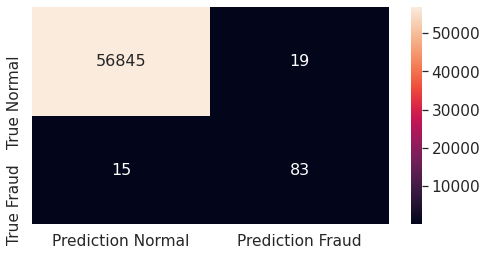

In [200]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
xgb_smote_accuracy = accuracy_score(y_test, y_test_pred)
xgb_smote_recall = recall_score(y_test, y_test_pred)
xgb_smote_cm = confusion_matrix(y_test, y_test_pred)
xgb_smote_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(xgb_smote_accuracy))
print("Recall: {:.4%}".format(xgb_smote_recall))
xgb_smote_cm = pd.DataFrame(xgb_smote_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgb_smote_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using XGB model with optimal Hyper-parameters using smote, we have observed that recall is 84%  and test accuracy comes out to be 99.94% .

In [201]:
accuracy_train_xgbsmote=round(accuracy_score(y_train_smote, y_train_pred)*100,2)
accuracy_test_xgbsmote=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_xgbsmote=round(f1_score(y_train_smote, y_train_pred)*100,2)
F1_test_xgbsmote=round(f1_score(y_test, y_test_pred)*100,2)

In [202]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_xgbsmote,F1_train_xgbsmote])
print(t)
t.add_row(['Testset',accuracy_test_xgbsmote,F1_test_xgbsmote])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  100.0   | 100.0 |
+----------+----------+-------+
| Testset  |  99.94   |  83.0 |
+----------+----------+-------+


### Print the class distribution after applying ADASYN

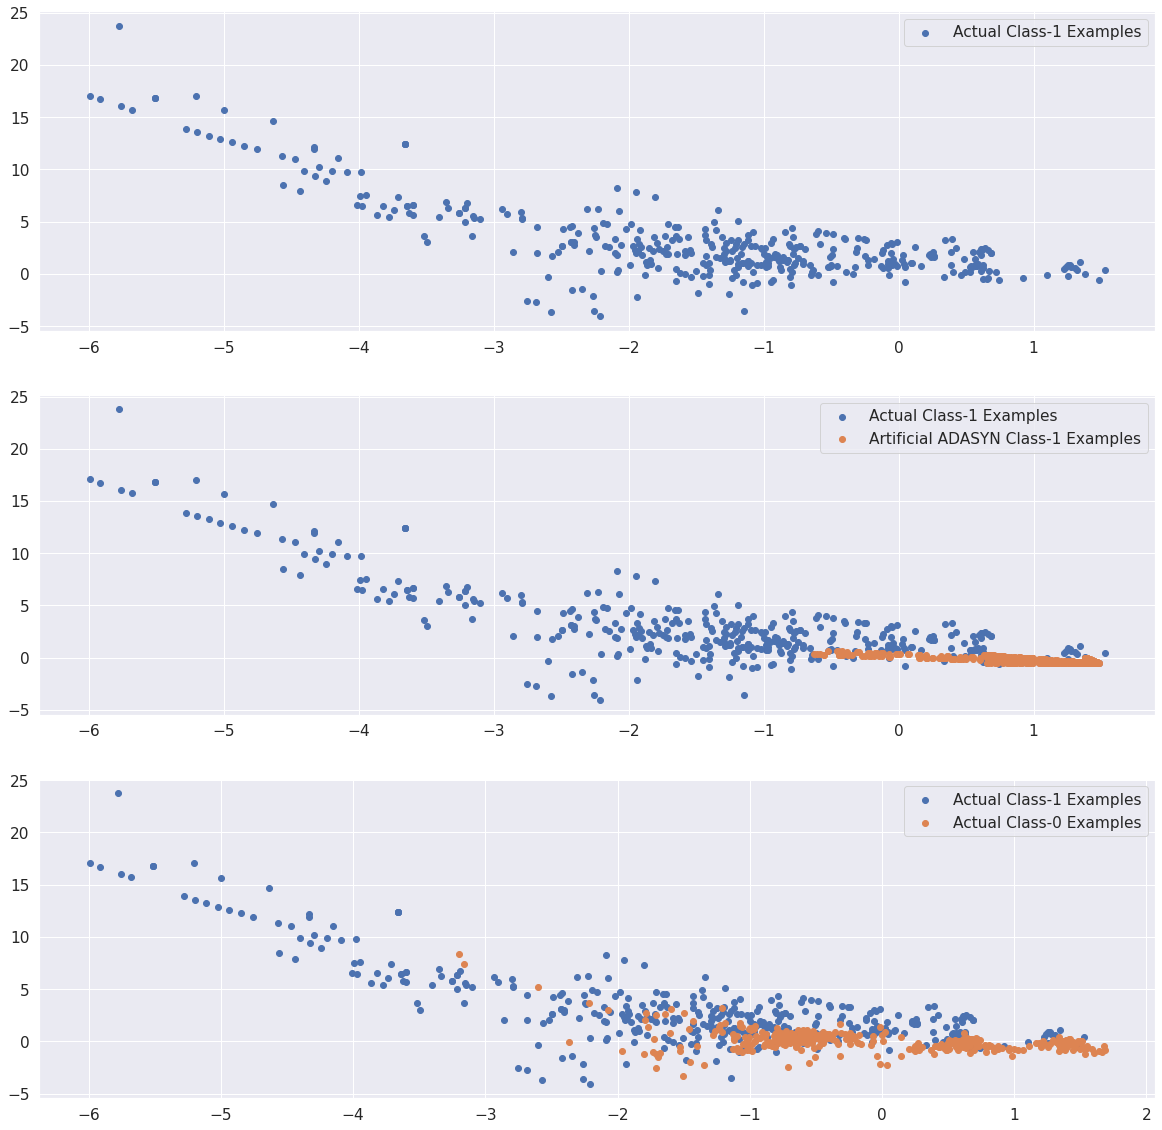

In [203]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Build models on other algorithms to see the better performing on ADASYN

# 1. Logistic Regression using ADASYN

In [204]:
# Instantiating the model with optimal hyper params
logreg_adasyn = LogisticRegression(C=1000)
# Fitting the model with train data
logreg_adasyn_model = logreg_adasyn.fit(X_train_adasyn, y_train_adasyn)

#### Evaluating the model on train data

In [205]:
# Predictions on the train set
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)

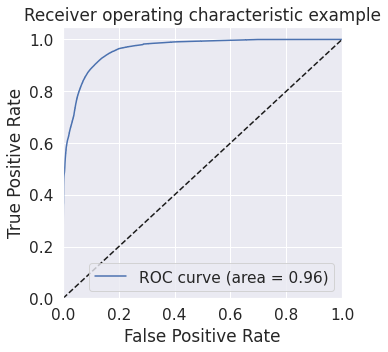

In [206]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [207]:
# Evaluating on test data
y_test_pred = logreg_adasyn_model.predict(X_test)

In [208]:
# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 3.23%
Accuracy: 90.22%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



In [209]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]

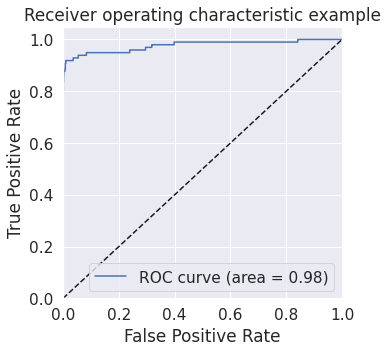

In [210]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 90.2198%
Recall: 94.8980%


<AxesSubplot:>

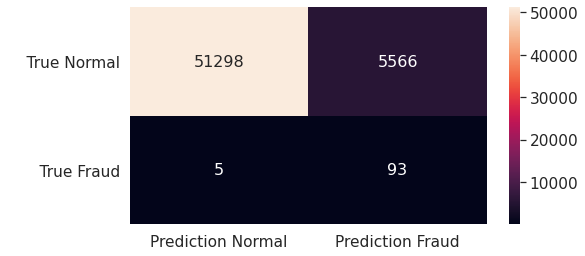

In [211]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
log_adasyn_accuracy = accuracy_score(y_test, y_test_pred)
log_adasyn_recall = recall_score(y_test, y_test_pred)
log_adasyn_cm = confusion_matrix(y_test, y_test_pred)
log_adasyn_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(log_adasyn_accuracy))
print("Recall: {:.4%}".format(log_adasyn_recall))
log_adasyn_cm = pd.DataFrame(log_adasyn_cm, ['    True Normal','    True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(log_adasyn_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Logistic regression model with optimal Hyper-parameters using adasyn sampling, we have observed that recall is 94%  and test accuracy comes out to be 90% . 

In [212]:
accuracy_train_logadasyn=round(accuracy_score(y_train_adasyn, y_train_pred)*100,2)
accuracy_test_logadasyn=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_logadasyn=round(f1_score(y_train_adasyn, y_train_pred)*100,2)
F1_test_logadasyn=round(f1_score(y_test, y_test_pred)*100,2)

In [213]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_logadasyn,F1_train_logadasyn])
print(t)
t.add_row(['Testset',accuracy_test_logadasyn,F1_test_logadasyn])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+------+
|   Data   | Accuracy |  F1  |
+----------+----------+------+
| Trainset |  89.31   | 89.2 |
+----------+----------+------+
| Testset  |  90.22   | 3.23 |
+----------+----------+------+


# 2.ADASYN using Decision Tree

#### Decision Tree with optimal hyperparameters

In [214]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=14, 
                                  min_samples_leaf=90,
                                  min_samples_split=110)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=90, min_samples_split=110,
                       random_state=100)

#### Prediction on the train set

In [215]:
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 98.52%
Accuracy: 98.51%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    227451
           1       0.98      0.99      0.99    227434

    accuracy                           0.99    454885
   macro avg       0.99      0.99      0.99    454885
weighted avg       0.99      0.99      0.99    454885



In [216]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]

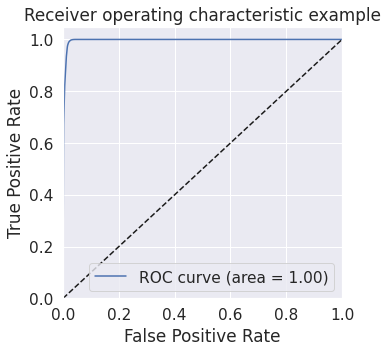

In [217]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [218]:
y_test_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 11.43%
Accuracy: 97.69%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [219]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]

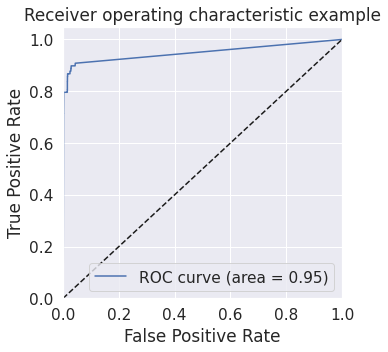

In [220]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 97.6879%
Recall: 86.7347%


<AxesSubplot:>

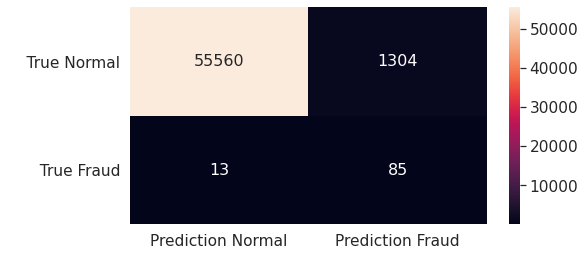

In [221]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
dt_adasyn_accuracy = accuracy_score(y_test, y_test_pred)
dt_adasyn_recall = recall_score(y_test, y_test_pred)
dt_adasyn_cm = confusion_matrix(y_test, y_test_pred)
dt_adasyn_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(dt_adasyn_accuracy))
print("Recall: {:.4%}".format(dt_adasyn_recall))
dt_adasyn_cm = pd.DataFrame(dt_adasyn_cm, ['    True Normal','  True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_adasyn_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Decision tree model with optimal Hyper-parameters using adasyn, we have observed that recall is 86%  and test accuracy comes out to be 97% . 

In [222]:
accuracy_train_dtadasyn=round(accuracy_score(y_train_adasyn, y_train_pred)*100,2)
accuracy_test_dtadasyn=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_dtadasyn=round(f1_score(y_train_adasyn, y_train_pred)*100,2)
F1_test_dtadasyn=round(f1_score(y_test, y_test_pred)*100,2)

In [223]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_dtadasyn,F1_train_dtadasyn])
print(t)
t.add_row(['Testset',accuracy_test_dtadasyn,F1_test_dtadasyn])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  98.51   | 98.52 |
+----------+----------+-------+
| Testset  |  97.69   | 11.43 |
+----------+----------+-------+


# 3. Random forest using AdaSyn

#### RF with optimal hyperparameters

In [224]:
# Model with optimal hyperparameters
rf_adasyn_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=14, 
                                  min_samples_leaf=90,
                                  min_samples_split=110)
rf_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=14, min_samples_leaf=90, min_samples_split=110,
                       random_state=100)

#### Prediction on the train set

In [225]:
y_train_pred = rf_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.74%
Accuracy: 99.74%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



In [226]:
# Predicted probability
y_train_pred_proba = rf_adasyn_model.predict_proba(X_train_adasyn)[:,1]

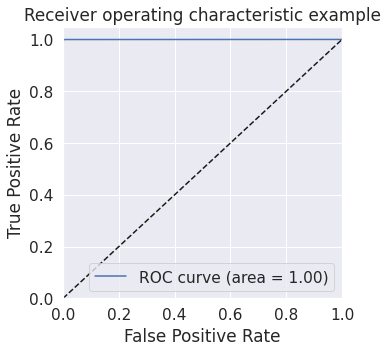

In [227]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [228]:
y_test_pred = rf_adasyn_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 34.66%
Accuracy: 99.42%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.22      0.89      0.35        98

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [229]:
# Predicted probability
y_test_pred_proba = rf_adasyn_model.predict_proba(X_test)[:,1]

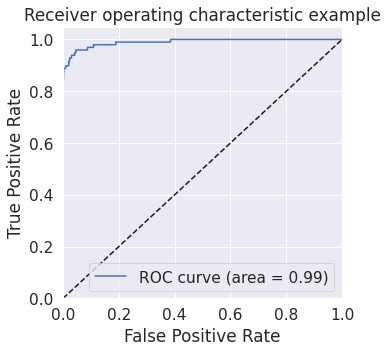

In [230]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Confusion Matrix

Accuracy: 99.4242%
Recall: 88.7755%


<AxesSubplot:>

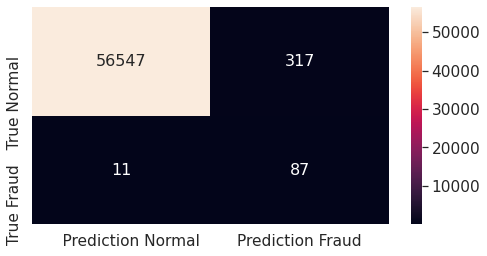

In [231]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
rf_adasyn_accuracy = accuracy_score(y_test, y_test_pred)
rf_adasyn_recall = recall_score(y_test, y_test_pred)
rf_adasyn_cm = confusion_matrix(y_test, y_test_pred)
rf_adasyn_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(rf_adasyn_accuracy))
print("Recall: {:.4%}".format(rf_adasyn_recall))
rf_adasyn_cm = pd.DataFrame(rf_adasyn_cm, ['   True Normal','True Fraud'],['    Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_adasyn_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using Random forest model with optimal Hyper-parameters, we have observed that recall is 88% and test accuracy comes out to be 99.4% .

In [232]:
accuracy_train_rfadasyn=round(accuracy_score(y_train_adasyn, y_train_pred)*100,2)
accuracy_test_rfadasyn=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_rfadasyn=round(f1_score(y_train_adasyn, y_train_pred)*100,2)
F1_test_rfadasyn=round(f1_score(y_test, y_test_pred)*100,2)

In [233]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_rfadasyn,F1_train_rfadasyn])
print(t)
t.add_row(['Testset',accuracy_test_rfadasyn,F1_test_rfadasyn])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  99.74   | 99.74 |
+----------+----------+-------+
| Testset  |  99.42   | 34.66 |
+----------+----------+-------+


# XGBoost using Adasyn

In [234]:
#Fitting the data with Best Parameters
xgb_adasyn_tune = XGBClassifier(subsample=0.6,learning_rate=0.6)
xgb_adasyn_tune.fit(X_train_adasyn, y_train_adasyn)

[14:47:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [235]:
y_train_pred = xgb_adasyn_tune.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Accuracy: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



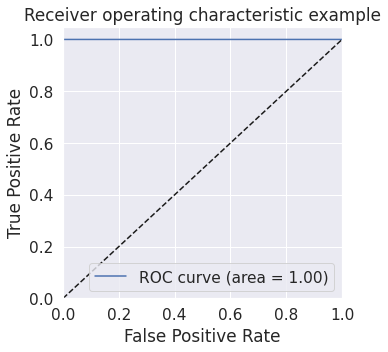

In [236]:
y_train_pred_proba = xgb_adasyn_tune.predict_proba(X_train_adasyn)[:,1]# Predicted probability
draw_roc(y_train_adasyn, y_train_pred_proba)# Plot the ROC curve

##### Evaluating model on test set

In [237]:
y_test_pred = xgb_adasyn_tune.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 83.17%
Accuracy: 99.94%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.86      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



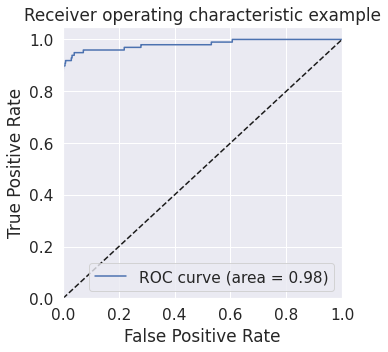

In [238]:
y_test_pred_proba =xgb_adasyn_tune.predict_proba(X_test)[:,1]# Predicted probability
draw_roc(y_test, y_test_pred_proba)# Plot the ROC curve

##### Confusion Matrix

Accuracy: 99.9403%
Recall: 85.7143%


<AxesSubplot:>

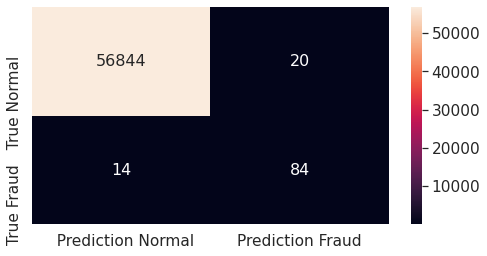

In [239]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
xgb_adasyn_accuracy = accuracy_score(y_test, y_test_pred)
xgb_adasyn_recall = recall_score(y_test, y_test_pred)
xgb_adasyn_cm = confusion_matrix(y_test, y_test_pred)
xgb_adasyn_auc = roc_auc_score(y_test, y_test_pred)
print("Accuracy: {:.4%}".format(xgb_adasyn_accuracy))
print("Recall: {:.4%}".format(xgb_adasyn_recall))
xgb_adasyn_cm = pd.DataFrame(xgb_adasyn_cm, ['  True Normal','True Fraud'],['  Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgb_adasyn_cm, annot=True,annot_kws={"size": 16},fmt='g')

##### Observation : By using XGB tree model with optimal Hyper-parameters using Adasyn , we have observed that recall is 85%  and test accuracy comes out to be 99.9% . 

In [240]:
accuracy_train_xgbadasyn=round(accuracy_score(y_train_adasyn, y_train_pred)*100,2)
accuracy_test_xgbadasyn=round(accuracy_score(y_test, y_test_pred)*100,2)
F1_train_xgbadasyn=round(f1_score(y_train_adasyn, y_train_pred)*100,2)
F1_test_xgbadasyn=round(f1_score(y_test, y_test_pred)*100,2)

In [241]:
from prettytable import PrettyTable
t = PrettyTable(['Data','Accuracy', 'F1'])
t.hrules = 1
t.add_row(['Trainset',accuracy_train_xgbadasyn,F1_train_xgbadasyn])
print(t)
t.add_row(['Testset',accuracy_test_xgbadasyn,F1_test_xgbadasyn])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+----------+----------+-------+
|   Data   | Accuracy |   F1  |
+----------+----------+-------+
| Trainset |  100.0   | 100.0 |
+----------+----------+-------+
| Testset  |  99.94   | 83.17 |
+----------+----------+-------+


### Observation :The best model with great accuracy and with decent recall is XG boost using Adasyn sampling
##### using XGB with adasyn , we obtained Accuracy = 99.94 and recall = 85.31

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


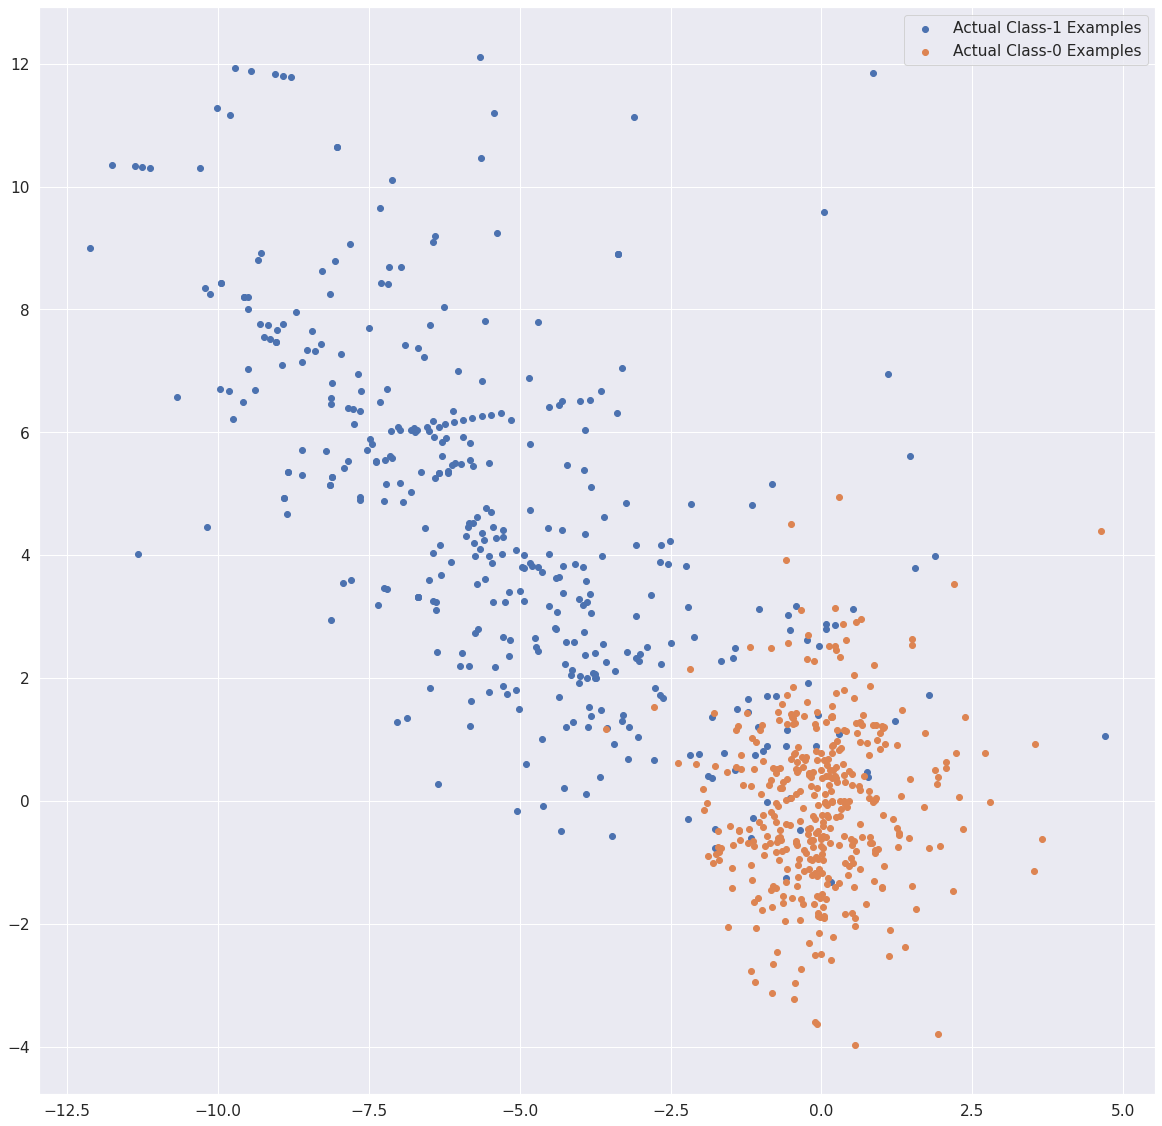

In [246]:
var_imp = []
for i in xgb_adasyn_tune.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_tune.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_tune.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_tune.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_tune.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_tune.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [247]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9733218


##### We have found that 97% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data using adasyn sampling

#### Model evaluation scores (Imbalanced data)

In [279]:
t = PrettyTable(['Model','Test AUC Score', 'recall','Test Accuracy'])
t.hrules = 1
t.add_row(['Logistic Regression',round((logimb_auc),2),round((logimb_recall),2),round((logimb_accuracy)*100,2)])
print(t)
t.add_row(['Decision tree',round((dt_imb_auc),2),round((dt_imb_recall),2),round((dt_imb_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['Random Forest',round((rf_imb_auc),2),round((rf_imb_recall),2),round((rf_imb_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['GBDT',round((gbc_imb_auc),2),round((gbc_imb_recall),2),round((gbc_imb_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['XGBoost',round((xgb_imb_auc),2),round((xgb_imb_recall),2),round((xgb_imb_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+---------------------+----------------+--------+---------------+
|        Model        | Test AUC Score | recall | Test Accuracy |
+---------------------+----------------+--------+---------------+
| Logistic Regression |      0.8       |  0.59  |     99.91     |
+---------------------+----------------+--------+---------------+
|    Decision tree    |      0.76      |  0.52  |     99.89     |
+---------------------+----------------+--------+---------------+
|    Random Forest    |      0.81      |  0.62  |     99.92     |
+---------------------+----------------+--------+---------------+
|         GBDT        |      0.83      |  0.65  |     99.91     |
+---------------------+----------------+--------+---------------+
|       XGBoost       |      0.89      |  0.79  |     99.96     |
+---------------------+----------------+--------+---------------+


##### Model evaluation scores (Random over sampling)

In [280]:
t = PrettyTable(['Model','Test AUC Score', 'recall','Test Accuracy'])
t.add_row(['Logistic Regression',round((logover_auc),2),round((logover_recall),2),round((logover_accuracy)*100,2)])
print(t)
t.add_row(['Decision tree',round((dt_over_auc),2),round((dt_over_recall),2),round((dt_over_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['Random Forest',round((rf_over_auc),2),round((rf_over_recall),2),round((rf_over_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['GBDT',round((gbc_over_auc),2),round((gbc_over_recall),2),round((gbc_over_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['XGBoost',round((xgb_over_auc),2),round((xgb_over_recall),2),round((xgb_over_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+---------------------+----------------+--------+---------------+
|        Model        | Test AUC Score | recall | Test Accuracy |
+---------------------+----------------+--------+---------------+
| Logistic Regression |      0.95      |  0.92  |      97.3     |
+---------------------+----------------+--------+---------------+
|    Decision tree    |      0.89      |  0.79  |     99.68     |
+---------------------+----------------+--------+---------------+
|    Random Forest    |      0.94      |  0.88  |     99.91     |
+---------------------+----------------+--------+---------------+
|         GBDT        |      0.91      |  0.82  |     99.96     |
+---------------------+----------------+--------+---------------+
|       XGBoost       |      0.91      |  0.82  |     99.96     |
+---------------------+----------------+--------+---------------+


##### Model evaluation scores (SMOTE)

In [281]:
t = PrettyTable(['Model','Test AUC Score', 'recall','Test Accuracy'])
t.add_row(['Logistic Regression',round((log_smote_auc),2),round((log_smote_recall),2),round((log_smote_accuracy)*100,2)])
print(t)
t.add_row(['Decision tree',round((dt_smote_auc),2),round((dt_smote_recall),2),round((dt_smote_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['Random Forest',round((rf_smote_auc),2),round((rf_smote_recall),2),round((rf_smote_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['XGBoost',round((xgb_smote_auc),2),round((xgb_smote_recall),2),round((xgb_smote_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+---------------------+----------------+--------+---------------+
|        Model        | Test AUC Score | recall | Test Accuracy |
+---------------------+----------------+--------+---------------+
| Logistic Regression |      0.94      |  0.92  |     97.09     |
+---------------------+----------------+--------+---------------+
|    Decision tree    |      0.91      |  0.84  |     99.21     |
+---------------------+----------------+--------+---------------+
|    Random Forest    |      0.94      |  0.89  |     99.81     |
+---------------------+----------------+--------+---------------+
|       XGBoost       |      0.92      |  0.85  |     99.94     |
+---------------------+----------------+--------+---------------+


##### Model evaluation scores (Adasyn)

In [282]:
t = PrettyTable(['Model','Test AUC Score', 'recall','Test Accuracy'])
t.add_row(['Logistic Regression',round((log_adasyn_auc),2),round((log_adasyn_recall),2),round((log_adasyn_accuracy)*100,2)])
print(t)
t.add_row(['Decision tree',round((dt_adasyn_auc),2),round((dt_adasyn_recall),2),round((dt_adasyn_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['Random Forest',round((rf_adasyn_auc),2),round((rf_adasyn_recall),2),round((rf_adasyn_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )
t.add_row(['XGBoost',round((xgb_adasyn_auc),2),round((xgb_adasyn_recall),2),round((xgb_adasyn_accuracy)*100,2)])
print( "\n".join(t.get_string().splitlines()[-2:]) )

+---------------------+----------------+--------+---------------+
|        Model        | Test AUC Score | recall | Test Accuracy |
+---------------------+----------------+--------+---------------+
| Logistic Regression |      0.93      |  0.95  |     90.22     |
+---------------------+----------------+--------+---------------+
|    Decision tree    |      0.92      |  0.87  |     97.69     |
+---------------------+----------------+--------+---------------+
|    Random Forest    |      0.94      |  0.89  |     99.42     |
+---------------------+----------------+--------+---------------+
|       XGBoost       |      0.93      |  0.86  |     99.94     |
+---------------------+----------------+--------+---------------+


##### <span style="color:Red">Overall observations : 
##### <span style="color:green">1. The model XG Boost is performed robust interms of Accuracy with incorporating sampling techniques. The test accuracies are over 99% for all sampling techniques and best recall score (86%) comes with Adasyn Sampling technique
    
##### <span style="color:green">2. If recall scores are considered , logistic regression preformed best with all sampling techniques compared to other models. But accuracies are much lower than others

##### <span style="color:green">3. Random forest model is the 2nd best model after XG boost interms of accuracies, but it is performed better than XGBoost in terms of recall score </span>

##### <span style="color:blue">As the up-sampling data points are not real world, the models which yields better recall scores must be considered rather than better accuracies . Here, XGBoost is the best fit with good recall score with the imbalanced data